# Earnings based on college majors
The aim of the project is to train visualization on a dataset whilst discovering whether we can find a correlation across the variables. Some of the question we will answer are the following.  
1) Do students in more popular majors make more money? (scatter plots)  
2) How many majors are predominantly male? Predominantly female? (histograms)  
3) Which category of majors have the most students? (Using bar plots)  

First let's recover the [data dictionary](https://github.com/fivethirtyeight/data/blob/master/college-majors/readme.md).
- **Rank** - Rank by median earnings (the dataset is ordered by this column).
- **Major_code** - Major code.
- **Major** - Major description.
- **Major_category** - Category of major.
- **Total** - Total number of people with major.
- **Sample_size** - Sample size (unweighted) of full-time, year-round only. Used to calculate earnings.
- **Men** - Male graduates.
- **Women** - Female graduates.
- **ShareWomen** - Women as share of total.
- **Employed** - Number employed.
- **Full_time** - Number employed 35 hours or more.
- **Part_time** - Number employed less than 35 hours.
- **Full_time_year_round** - Employed at least 50 weeks (WKW == 1) and at least 35 hours (WKHP >= 35)
- **Unemployed** - Number unemployed (ESR == 3)
- **Unemployment_rate** - Unemployed / (Unemployed + Employed)
- **Median** - Median salary of full-time, year-round workers.
- **College_jobs** - Number with job requiring a college degree
- **Non_college_jobs** - Number with job not requiring a college degree
- **Low_wage_jobs** - Number in low-wage service jobs.


In [1]:
import matplotlib

%matplotlib inline 
#magic function that will display graphs into the cells.

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

recent_grads = pd.read_csv('recent-grads.csv')

In [2]:
recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [3]:
#revert all headers to lowercase and set more 'talkative' column names
recent_grads.columns = recent_grads.columns.str.lower()
recent_grads.rename({'median': 'median_salary'}, axis='columns', inplace = True)

In [4]:
recent_grads.head()

,rank,major_code,major,total,men,women,major_category,sharewomen,sample_size,employed,...,part_time,full_time_year_round,unemployed,unemployment_rate,median_salary,p25th,p75th,college_jobs,non_college_jobs,low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [5]:
recent_grads.tail()

,rank,major_code,major,total,men,women,major_category,sharewomen,sample_size,employed,...,part_time,full_time_year_round,unemployed,unemployment_rate,median_salary,p25th,p75th,college_jobs,non_college_jobs,low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [6]:
recent_grads.describe()

,rank,major_code,total,men,women,sharewomen,sample_size,employed,full_time,part_time,full_time_year_round,unemployed,unemployment_rate,median_salary,p25th,p75th,college_jobs,non_college_jobs,low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [7]:
raw_data_count = recent_grads.shape[0] #173 rows
recent_grads = recent_grads.dropna() #removes records with null values. Important otherwise matplotlib will throw errors.
cleaned_data_count = recent_grads.shape[0] #172 ros

Text(0.5, 1.0, 'Employed vs. Sample_size')

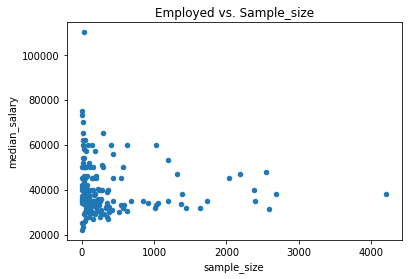

In [8]:
ax = recent_grads.plot(x='sample_size', y='median_salary', kind='scatter')
ax.set_title('Employed vs. Sample_size')
#ax.set_xlim(0,2000)
#ax.set_ylim(20000,80000)

Text(0.5, 1.0, 'Unemployment rate vs Sample size')

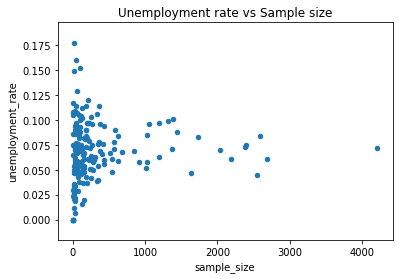

In [9]:
ax = recent_grads.plot(x='sample_size', y='unemployment_rate', kind='scatter')
ax.set_title('Unemployment rate vs Sample size')

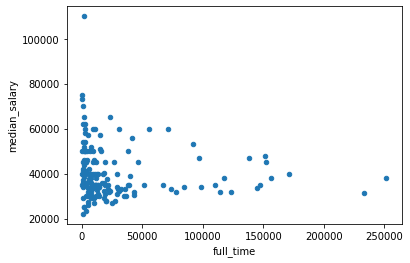

In [10]:
recent_grads.plot(x='full_time', y='median_salary', kind='scatter')

Text(0.5, 1.0, 'Unemployment rate vs Share of women')

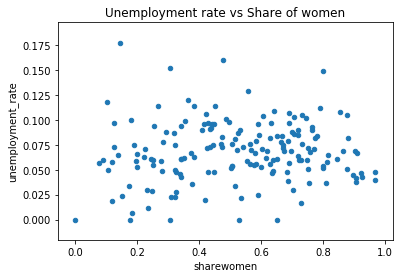

In [11]:
ax = recent_grads.plot(x='sharewomen', y='unemployment_rate', kind='scatter')
ax.set_title('Unemployment rate vs Share of women')

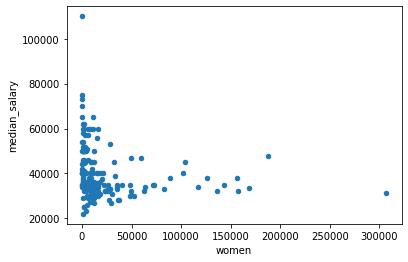

In [12]:
ax = recent_grads.plot(x='women', y='median_salary', kind='scatter')
#ax.set_title('Unemployment rate vs Share of women')

### 1) **Do students in more popular majors make more money?** 

In [13]:
top20_popular = recent_grads[['major','total']].sort_values(by = 'total', ascending = False).head(20)
bottom20_popular = recent_grads[['major','total']].sort_values(by = 'total', ascending = False).tail(20)

#define masks as bool arrays
top20_mask = recent_grads['major'].isin(top20_popular.iloc[:,0])
bottom20_mask = recent_grads['major'].isin(bottom20_popular.iloc[:,0])

#define subsets
top20_df = recent_grads[top20_mask]
bottom20_df = recent_grads[bottom20_mask]

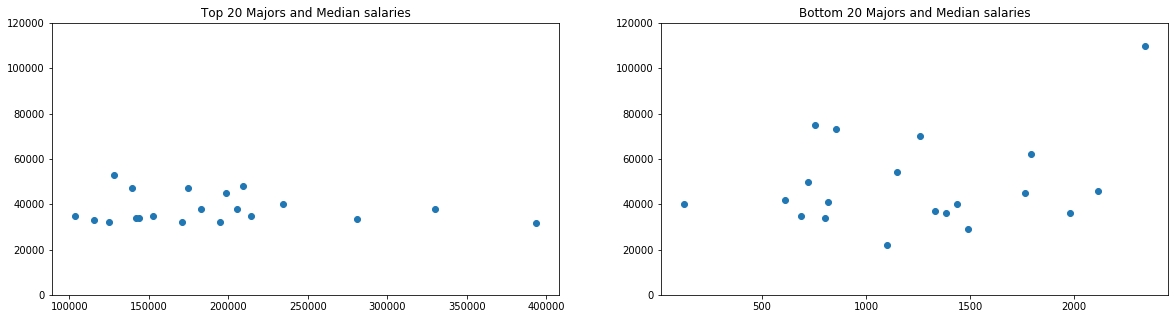

In [14]:
#draw two plots
fig = plt.figure(figsize=(20,5))

#add plots
top20 = fig.add_subplot(1,2,1)
bottom20 = fig.add_subplot(1,2,2)

#populate with data
top20.scatter('total','median_salary', data=top20_df)
bottom20.scatter('total','median_salary', data=bottom20_df)

#style
top20.set_ylim(0,120000)
bottom20.set_ylim(0,120000)
top20.set_title('Top 20 Majors and Median salaries')
bottom20.set_title('Bottom 20 Majors and Median salaries')

plt.show()


In [15]:
print(bottom20_df['median_salary'].mean())
print(top20_df['median_salary'].mean())

bottom20_df['median_salary'].mean()/top20_df['median_salary'].mean()

48850.0
38045.0


1.2840057826258378

By looking at the Top/Bottom 20 Majors by people graduated, there is an interesting evidence in the fact that less common graduates have a median salary which is **28% higher** than the top20 courses.

### 2) **Do students that majored in subjects that were majority female make more money?**  



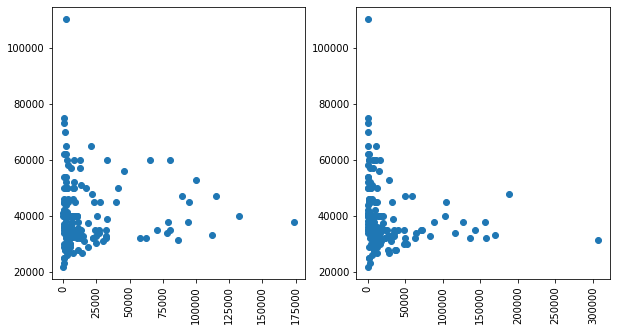

In [16]:
fig = plt.figure(figsize=(10,5))                 
                 
#add plots
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

#populate with data
ax1.scatter('men', 'median_salary', data=recent_grads)
ax2.scatter('women', 'median_salary', data=recent_grads)

#style
ax1.tick_params(axis='x', rotation = 90)
ax2.tick_params(axis='x', rotation = 90)


plt.show()

There is no strong evidence of a higher wage for female-driven majors.

### 3) **Is there any link between the number of full-time employees and median salary?**  
There is no clear correlation between being the number of full time employees and median salary. Overall, the shroud of points does not show, even with an help in visualization, any strong correlation.

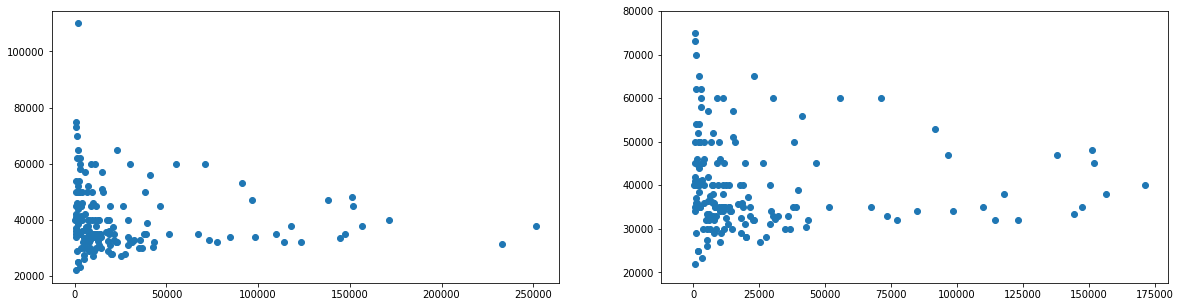

In [17]:
fig = plt.figure(figsize=(20,5))
#add plots
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.scatter('full_time','median_salary', data = recent_grads)
ax2.scatter('full_time','median_salary', data = recent_grads)

ax2.set_ylim(top=80000)
ax2.set_xlim(right=180000)

plt.show()

# Further exploration with histograms

Sample_size  
Median  
Employed  
Full_time  
ShareWomen  
Unemployment_rate  
Men  
Women

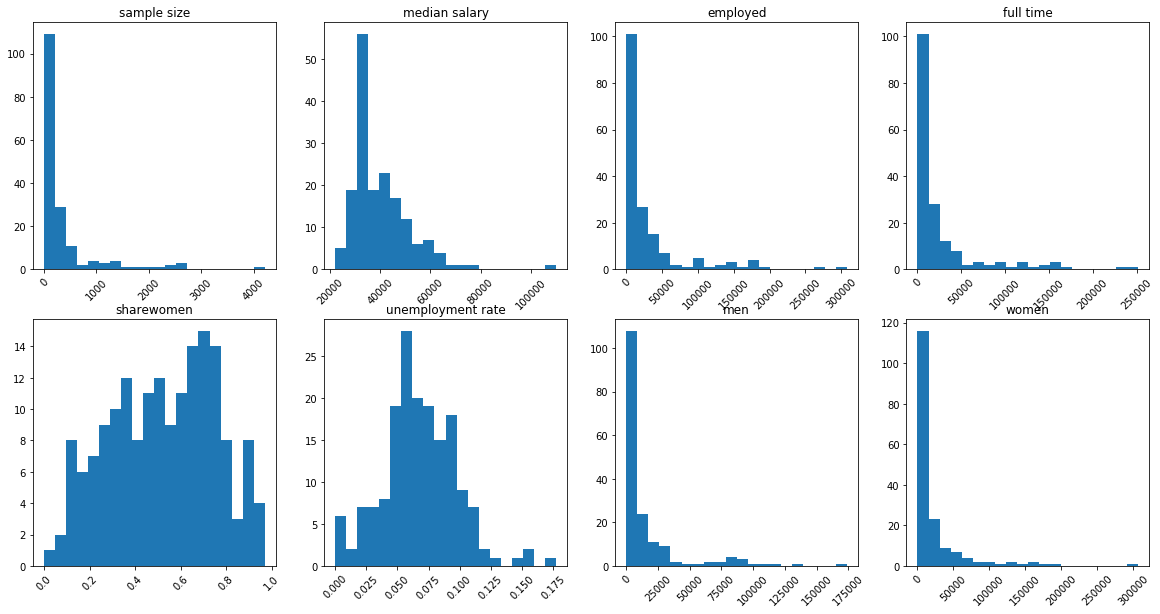

In [18]:
cols = ['sample_size','median_salary','employed','full_time','sharewomen','unemployment_rate','men','women']

fig = plt.figure(figsize=(20,10))

for i in range(len(cols)):
    col = cols[i] #column iterator
    bins_num = 20

    ax = fig.add_subplot(2,4,i+1)
    ax.hist(recent_grads[col], bins=bins_num)
    ax.set_title(col
                 .replace('_', ' '))
    ax.tick_params(axis='x', rotation = 45)

### 1) What's the most common median salary range?
The most common salary range is by far between 20 and 40k.

# Further exploration with histograms

In [19]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1265F830>,
      dtype=object)

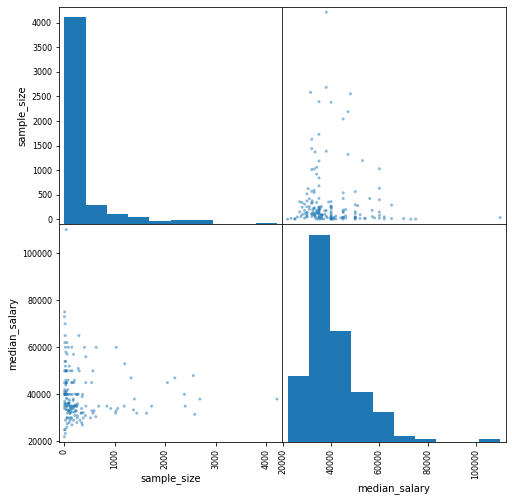

In [20]:
scatter_matrix(recent_grads[['sample_size', 'median_salary']], figsize=(8,8))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12F15A50>,
      dtype=object)

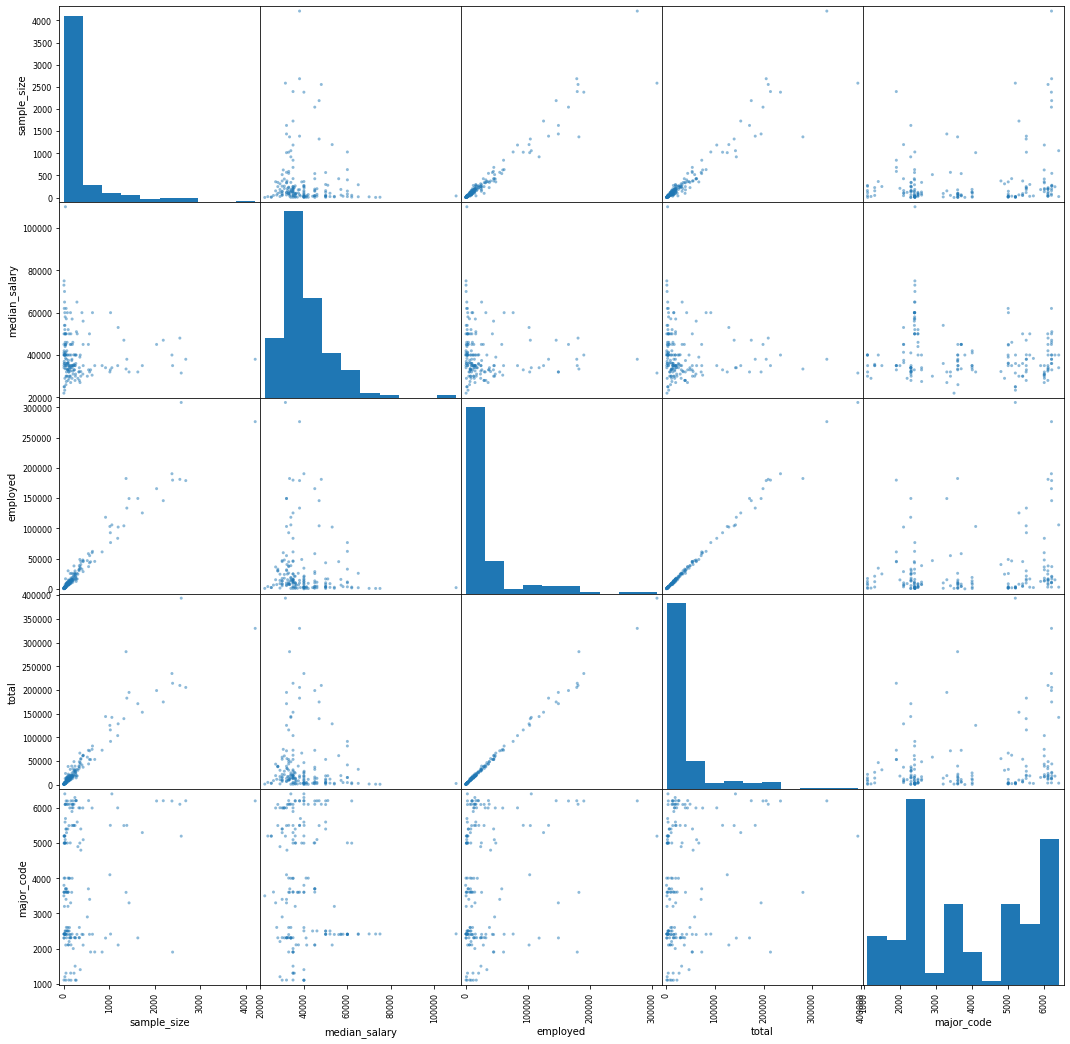

In [21]:
scatter_matrix(recent_grads[['sample_size', 'median_salary', 'employed','total', 'major_code' ]],
               figsize=(18,18), diagonal = 'hist')
#diagonal = 'kde'

The graph above explains a set of potential correlation across variables. It is useful in the way it allows you to explore a set of vars all at once.  
- The histograms map the distribution of values (in 10 bins) for a specific variable.
- The scatter plots instead allow you to read relationships across two variables.  

Some instances:
- **STRONG Positive relationship bewteen total number with majors and people employed.**
There is a linear, strong correlation between the variables. Every dot represents a major course, and it plots the number of people with majors, and the number employed. These two numbers are strongly correlated in the way they go alongside: few people with majors, few emplyes. Many people with majors, many employed.
- **Positive relationship betweem sample size and people employed**
There is a linear correlation between the variables. The wider your sample, the higher the number (volume) of employed people. (with some exceptions). These are courses for which you might not have huge sample, but still many people employed.
- **ZERO correlation between major_code and any variable.**

# Creating plots with Pandas

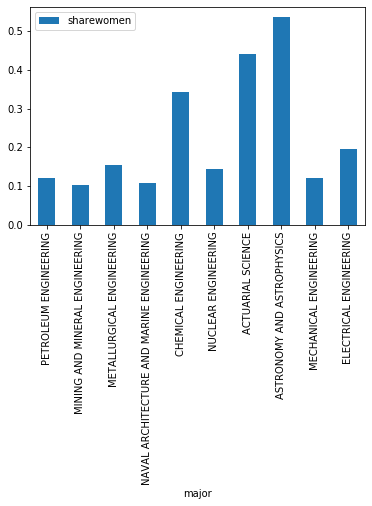

In [22]:
recent_grads[:10].plot.bar(x='major', y='sharewomen', legend = True)

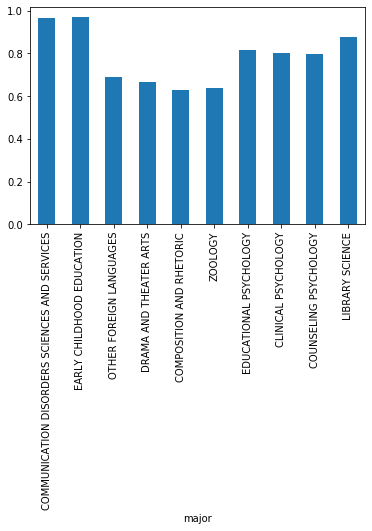

In [23]:
recent_grads.tail(10).plot.bar(x='major', y='sharewomen', legend=False)

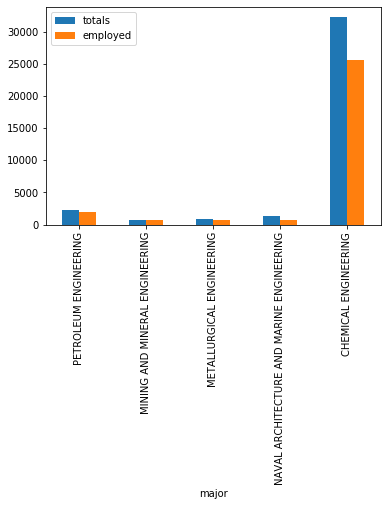

In [24]:
>>> totals = recent_grads['total'].head(5)
>>> employed = recent_grads['employed'].head(5)
>>> totals.index = recent_grads['major'].head(5)
>>> employed.index = recent_grads['major'].head(5)
    
>>> index = recent_grads['major'].head(5)
>>> df = pd.DataFrame({'totals': totals,
...                    'employed': employed}, index = index)
>>> ax = df.plot.bar(rot=90)

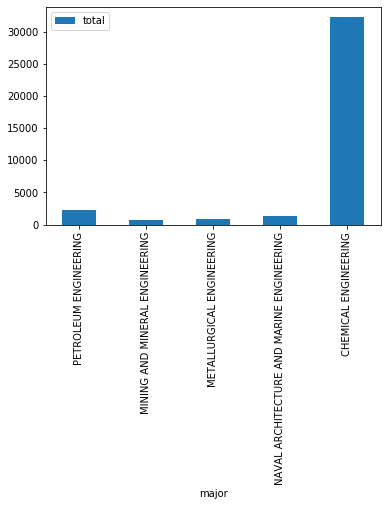

In [26]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html
>>> ax = recent_grads[0:5].plot.bar(x='major', y='total', rot=90)
